# CATENE DI MARKOV

Sia p sia la seguente matrice <br>

[ 0.5 0.2 0.3 ]<br>
[ 0.1 0.6 0.3 ]<br>
[ 0.0 0.0 1.0 ]<br>

1)Sia Pij la probabilità di transizione per passare dallo stato i allo stato j <br>
2) STATI ASSORBENTI : una colonna che ha solo zeri tranne sulla diagonale,stati assorbenti <br>
3) Gli stati i e j comunicano se Pij>0 <br>
4) classe irriducibile : è un insisme di stati in cui è possibile raggiungere da ogni stato <br>
5) se la catena di markov è irriducibile e ha una distribuzione stazionaria, la riga corrispondente
sarà un vettore invarianete per P

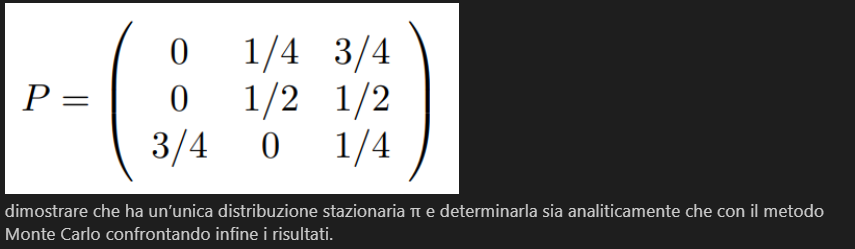

In [3]:
# TUTTA LA TEORIA PER  DETERMINARE CHE HA UN'UNICA DISTRIBUZIOEN STAZIONARIA
# 1->2  1->3
# 2->2  2->3
# 3>1   3->3
# 1->2 E 2->3 PROPRIETà TRANSITIVA

#tutti gli stati comunicano fra di loro quindi la classe è irriducibile
#dato che la catena è regolare e inoltre esiste phh > 0 allora la catena è REGOLARE
# dato che p ha tutti gli elementi > 0 - P è regolare
# Per il teorema di Markov ha un unica distribuzione stazionaria

In [9]:
import numpy as np

X = np.array([[0,1/4,3/4],[0,1/2,1/2],[3/4,0,1/4]])
print(X@X)

[[0.5625 0.125  0.3125]
 [0.375  0.25   0.375 ]
 [0.1875 0.1875 0.625 ]]


In [17]:
#METODO ANALATICO

lamb, V = np.linalg.eig(X.T) #mi torna gli autovalori e autovettori
print("autovalori: \n", lamb)
print("autovettori: \n",V)

autovalori: 
 [-0.57569391  1.          0.32569391]
autovettori: 
 [[ 0.78010553 -0.57469577  0.55506939]
 [-0.18130286 -0.28734789 -0.79611302]
 [-0.59880267 -0.76626103  0.24104363]]


In [27]:
v = V[:,1]
N= np.sum(v)
v/N
#unica distribuzione stazionaria con metodo analitico

array([0.35294118, 0.17647059, 0.47058824])

In [106]:
#METODO MONTE CARLO

n = 3
F = np.zeros(n)
j = np.random.randint(n)
F[j]= 1


N = 10000
for i in range(N):
    jk = np.random.multinomial(1,X[j,:])
    j = np.nonzero(jk)[0][0]
    F[j] += 1

v= F/N
v

array([0.3517, 0.1768, 0.4716])

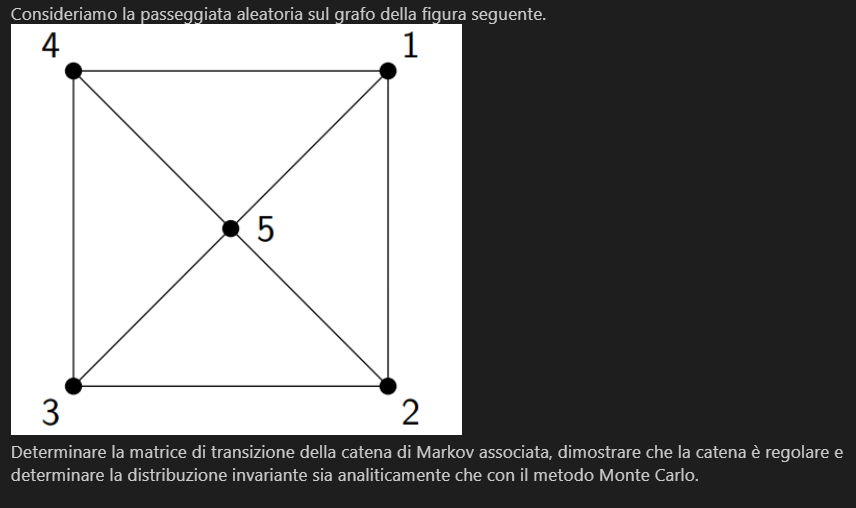    

In [109]:
matrix = np.array([[0,1/3,0,1/3,1/3],[1/3,0,1/3,0,1/3],[0,1/3,0,1/3,1/3],[1/3,0,1/3,0,1/3],[1/4,1/4,1/4,1/4,0]])
print(matrix)

[[0.         0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.         0.33333333]
 [0.         0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.         0.33333333]
 [0.25       0.25       0.25       0.25       0.        ]]


In [116]:
P = np.dot(matrix,matrix)
print(P)

[[0.30555556 0.08333333 0.30555556 0.08333333 0.22222222]
 [0.08333333 0.30555556 0.08333333 0.30555556 0.22222222]
 [0.30555556 0.08333333 0.30555556 0.08333333 0.22222222]
 [0.08333333 0.30555556 0.08333333 0.30555556 0.22222222]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.33333333]]


In [117]:
#la catena è regolare dato che tutti i pij > 0
# dato che è regolare e ha un insieme ifnito di stati possiede osolo una distribuzione stazionaria

In [131]:
lamb, V = np.linalg.eig(P.T)
print("autovalori: \n",lamb) 
print("autovettori: \n", V)

autovalori: 
 [ 1.00000000e+00  4.44444444e-01  1.11111111e-01  3.23558624e-18
 -9.93072636e-17]
autovettori: 
 [[ 4.16025147e-01  5.00000000e-01  2.23606798e-01 -2.09073343e-02
  -6.90269127e-01]
 [ 4.16025147e-01 -5.00000000e-01  2.23606798e-01 -7.06797625e-01
  -1.53390131e-01]
 [ 4.16025147e-01  5.00000000e-01  2.23606798e-01  2.09073343e-02
   6.90269127e-01]
 [ 4.16025147e-01 -5.00000000e-01  2.23606798e-01  7.06797625e-01
   1.53390131e-01]
 [ 5.54700196e-01  1.54741386e-17 -8.94427191e-01  1.56562997e-16
   1.39587131e-16]]


In [148]:
vi = V[:,0]
N = np.sum(vi)

vi/N

array([0.1875, 0.1875, 0.1875, 0.1875, 0.25  ])

In [146]:
n = 5
F = np.zeros(n)
j = np.random.randint(0,n)
F[j]= 1


N = 10000
for i in range(N):
    jk = np.random.multinomial(1,P[j])
    j = np.nonzero(jk)[0][0]
    F[j] += 1

v= F/N
v

array([0.1823, 0.193 , 0.1777, 0.1933, 0.2538])